In [1]:
library(ggplot2)
suppressPackageStartupMessages(library(dplyr))
library(reshape2)
set.seed(20201228)
options(repr.plot.width=15, repr.plot.height=8)

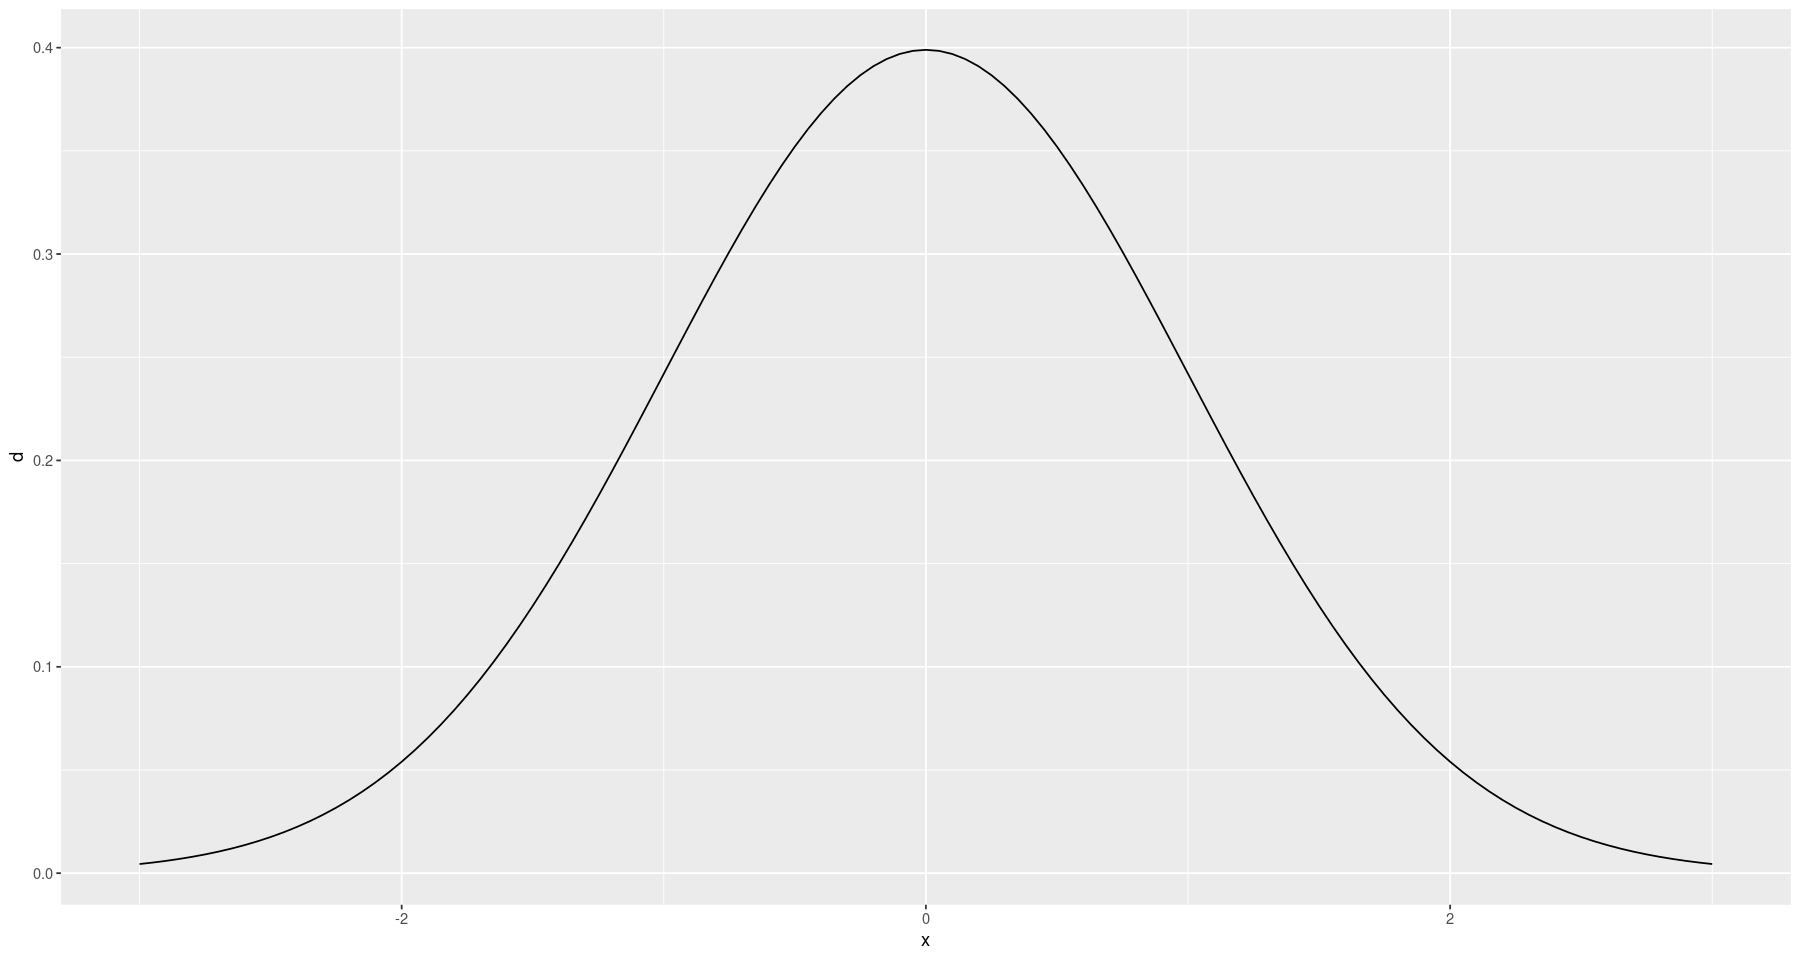

In [2]:
denseNorm <- data.frame(x=seq(-3,3,0.05))
denseNorm$d <- dnorm(denseNorm$x)
ggplot(denseNorm,aes(x,d)) + geom_line()

In [3]:
trueSamp <- rnorm(100)

In [4]:
sampSize <- length(trueSamp)
bootSamples <- lapply(seq_len(9),
                      function(n){data.frame(x=sample(trueSamp,sampSize,replace = TRUE),
                                             sample=paste("sample",n))})
bootSamples <- bind_rows(bootSamples)

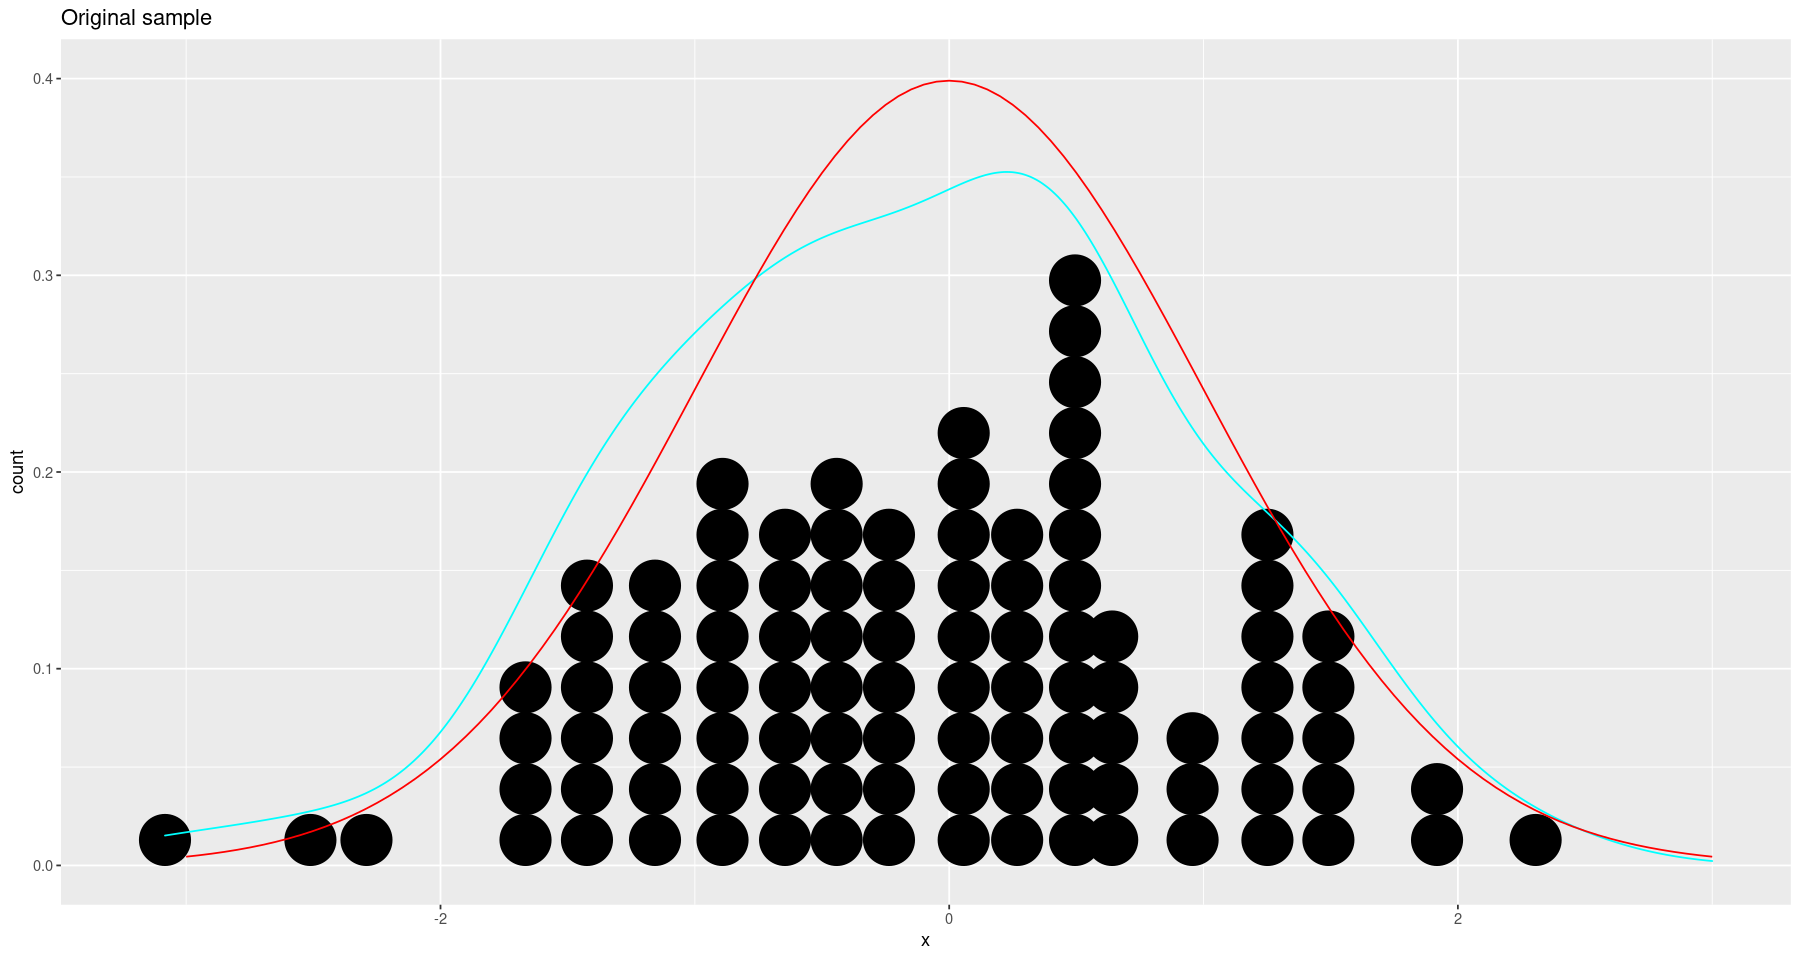

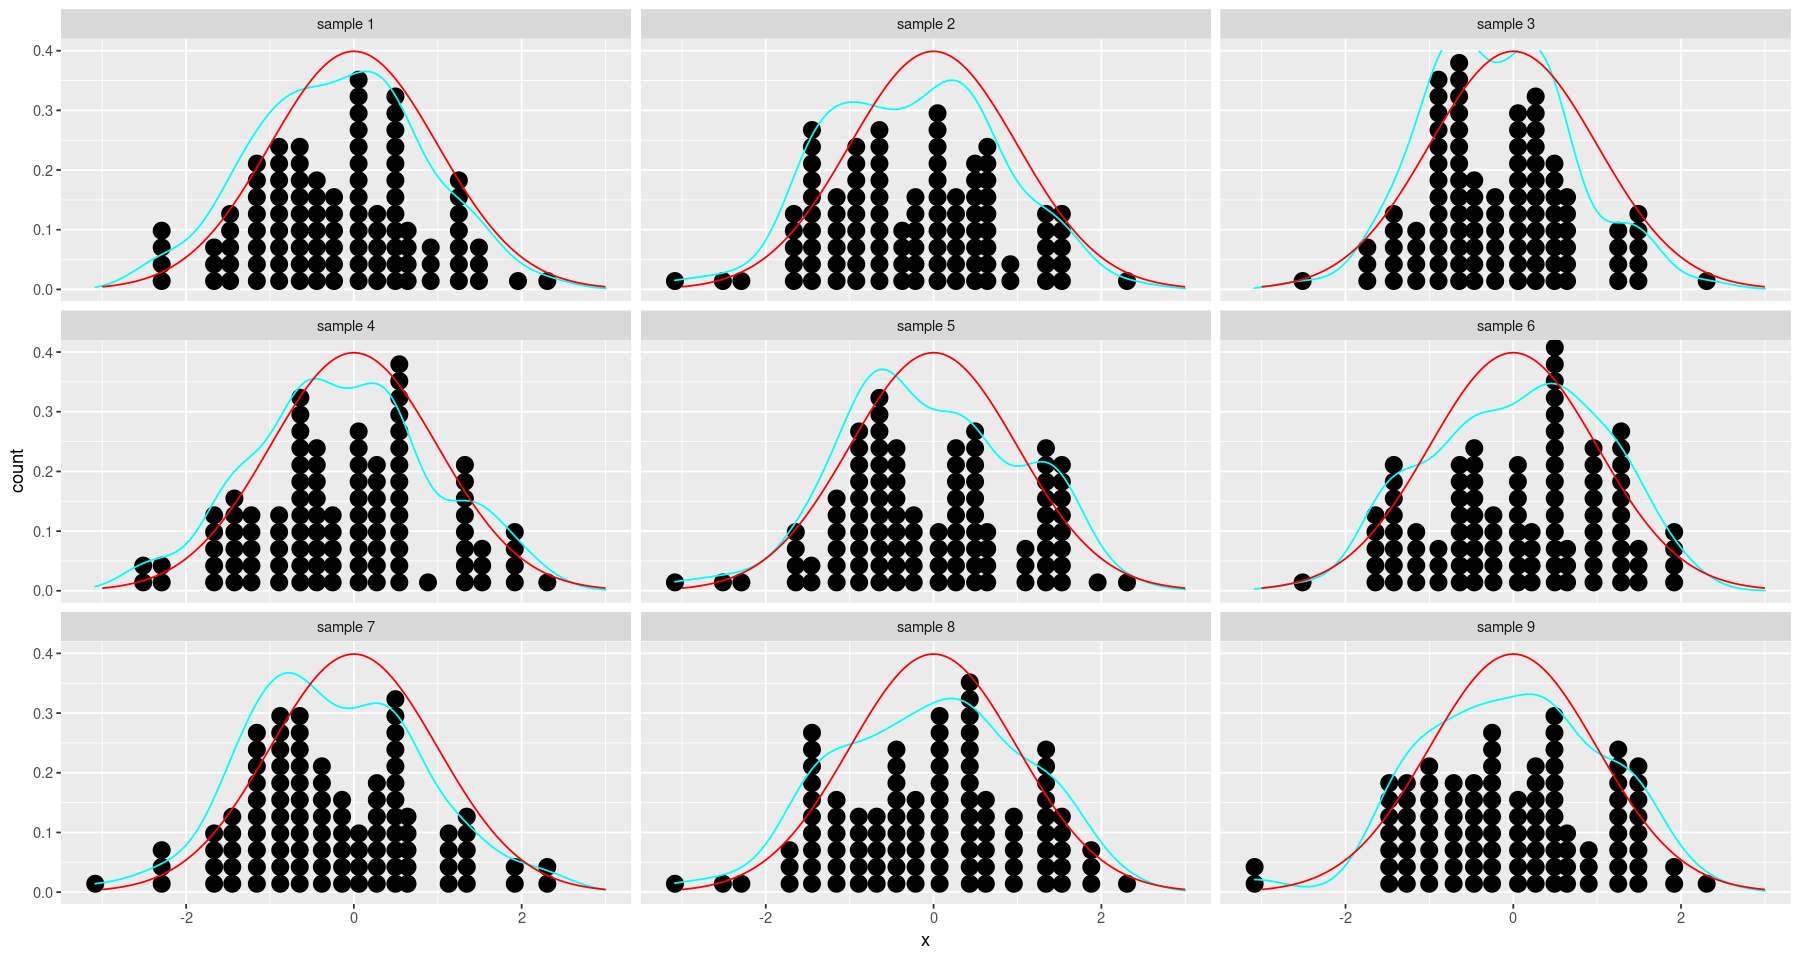

In [5]:
dline <- geom_line(data=denseNorm,aes(x,d),colour="red")
scalelim <- scale_y_continuous(limits=c(0,0.4))
ggplot(data.frame(x=trueSamp),aes(x=x)) + geom_dotplot(binwidth=0.2) +
  geom_density(aes(x=x),colour="cyan") + scalelim +
  dline + ggtitle("Original sample")
ggplot(bootSamples,aes(x=x)) + geom_dotplot(binwidth=0.2) +
  geom_density(aes(x=x),colour="cyan") + scalelim +
  facet_wrap(~sample) + dline